## Scatter plots

Here is a step by step code-a-long to get from the standard output of a scatterplot to a cool optimized visualization

The goal of data visualization is to learn and communicate insights about a dataset, specifically show the relationship between two variables in a dataset.
At the end of the notebook you will know how to:

    Create Scatterplots
    Change color schemes
    Work with colormaps

We'll be using Pandas DataFrames as the basis for these exercises as this is a usual use case while doing EDA.

We will be working with the Wine dataset from the UCI machine learning library. Info is here https://archive.ics.uci.edu/ml/datasets/wine


source: https://betterprogramming.pub/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c by Elizabeth Ter Sahakyan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Use the Wine dataset from the UCI machine learning library

#define column headers
columns = ['Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids',
           'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

# read_csv directly from url
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = columns)

In [3]:
# Take a look at the data
wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_df.describe().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


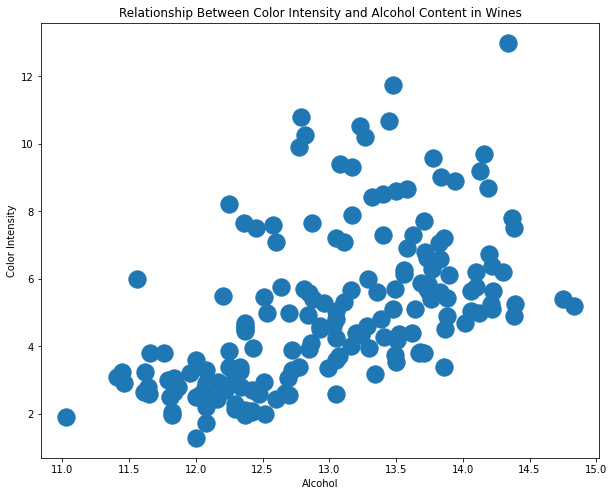

In [5]:
# set up figure and ax using object oriented interface
fig, ax1 = plt.subplots(figsize=(10,8))

#labels
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Color Intensity')
ax1.set_title('Relationship Between Color Intensity and Alcohol Content in Wines')

#plot
plt.scatter(wine_df['Alcohol'], # value for x axis
            wine_df['Color intensity'], # value for y axis
            s = 300); # Size of the dots

The simple approach to changing the colour is to use the 'color' parameter when calling the scatter function

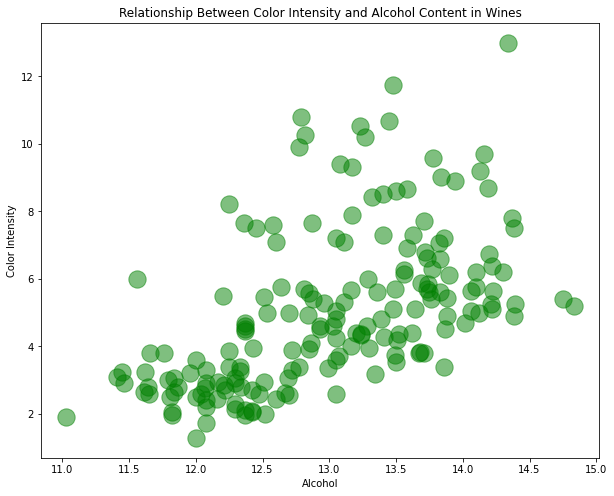

In [6]:
# Same setup as before
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Color Intensity')
ax1.set_title('Relationship Between Color Intensity and Alcohol Content in Wines')

# Set the color inside the scatter method and adjust the 'alpha' to allow transparancy
plt.scatter(wine_df['Alcohol'], 
            wine_df['Color intensity'], 
            s = 300, 
            color = 'green', 
            alpha = 0.5); 

### Colormaps

It is possible to color the scatterplot points based on a value in the dataset using a colormap. Colormaps take the arguments c and cmap inside scatter(), and color is not used. To use matplotlib colormaps, leave out the color argument and use 'c' and 'cmap'.

c is the array of numbers that will be mapped to the colorspace in the colormap. So point this at the column in our data that will be coloured.

There are many colormaps to choose from and the idea is to find one that works for the specifics of your dataset. Consider the following when choosing:

    * Whether representing form or metric data 
    * Your knowledge of the data set (e.g., is there a critical value from which the other values deviate?)
    * If there is an intuitive color scheme for the parameter you are plotting
    * If there is a standard in the field the audience may be expecting

For more read:
Color Sequences for Univariate Maps by Colin Ware:  http://ccom.unh.edu/sites/default/files/publications/Ware_1988_CGA_Color_sequences_univariate_maps.pdf  
All about colorblindness: https://www.color-blindness.com/

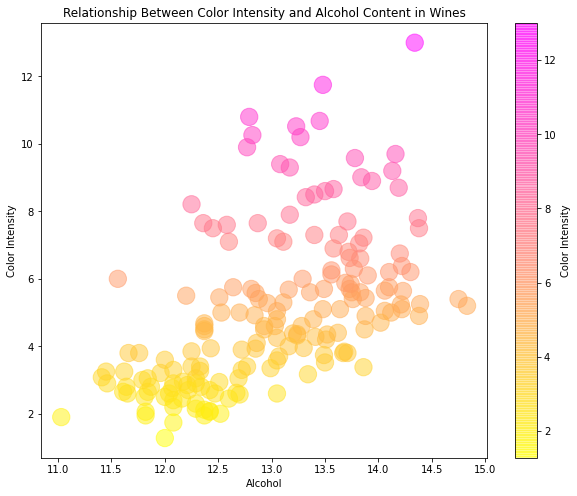

In [7]:
# Same setup again
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Color Intensity')
ax1.set_title('Relationship Between Color Intensity and Alcohol Content in Wines')

# Plot!
plt.scatter(wine_df['Alcohol'],
            wine_df['Color intensity'],
            c = wine_df['Color intensity'],
            cmap = 'spring_r', # try removing '_r' from the end of the cmap name
            s = 300, 
            alpha = 0.5) 
cbar = plt.colorbar()
cbar.set_label('Color Intensity')